In [ ]:
%pip install qiskit pylatexenc numpy matplotlib

# Алгоритм Дойча-Йожи

В этом разделе мы сначала вводим задачу Дойча-Йожа, а также классические и квантовые алгоритмы для ее решения. Затем мы реализуем квантовый алгоритм с помощью Qiskit и запускаем его на симуляторе и устройстве.

## 1. Введение <a id='introduction'></a>

Алгоритм Дойча-Йожа, был первым примером квантового алгоритма, который работает лучше, чем лучший классический алгоритм. Он показал, что использование квантового компьютера в качестве вычислительного инструмента для решения конкретной задачи может иметь преимущества.

### 1.1 Задача Дойча-Йожы <a id='djproblem'> </a>

Нам дана скрытая логическая функция $f$, которая принимает на вход строку битов и возвращает либо $0$, либо $1$, то есть:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ или } 1 \textrm{ , где } x_n \textrm{ равно } 0 \textrm{ или } 1$$

Свойство данной булевой функции состоит в том, что она гарантированно либо сбалансирована, либо постоянна. Константная функция возвращает все $0$ или все $1$ для любых входных данных, в то время как сбалансированная функция возвращает $0$ ровно для половины всех входных данных и $1$ для другой половины. Наша задача состоит в том, чтобы определить, является ли данная функция уравновешенной или постоянной.

Обратите внимание, что задача Дойча-Йожы является $n$-битным расширением однобитовой задачи Дойча.

### 1.2 Классическое решение <a id='classical-solution'> </a>

Классически в лучшем случае два запроса к оракулу могут определить, сбалансирована ли скрытая логическая функция $f(x)$:
например если мы получаем как $f(0,0,0,...)\rightarrow 0$, так и $f(1,0,0,...) \rightarrow 1$, то мы знаем, что функция сбалансирована, поскольку мы имеем получили два разных результата.

В худшем случае, если мы продолжаем видеть один и тот же вывод для каждого входного значения, которое мы пытаемся ввести, нам придется проверить ровно половину всех возможных входных данных плюс один, чтобы убедиться, что $f(x)$ постоянна. Поскольку общее количество возможных входов равно $2^n$, это означает, что нам нужно $2^{n-1}+1$ пробных входов, чтобы быть уверенными, что $f(x)$ постоянна в худшем случае. Например, для $4$-битной строки, если мы проверили $8$ из $16$ возможных комбинаций, получив все $0$, все еще возможно, что вход $9$й вернет $1$. и $f(x)$ сбалансирована. С точки зрения вероятности это очень маловероятное событие. На самом деле, если мы последовательно получаем один и тот же результат, мы можем выразить вероятность того, что функция постоянна как функция $k$ входных данных, как:



$$ P_\textrm{константа}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



На самом деле, мы могли бы сократить наш классический алгоритм досрочно, скажем, если бы мы были более чем на x% уверены. Но если мы хотим быть на 100 % уверенными, нам нужно будет проверить входные данные $2^{n-1}+1$.

### 1.3 Квантовое решение <a id='quantum-solution'> </a>

Используя квантовый компьютер, мы можем решить эту задачу со 100% уверенностью всего за один вызов функции $f(x)$, при условии, что функция $f$ реализована в виде квантового оракула, отображающего состояние $\vert x \rangle \vert y\rangle $ в $ \vert x\rangle \vert y \oplus f(x)\rangle$, где $\oplus$ — сложение по модулю $2$. Ниже приведена общая схема алгоритма Дойча-Йожы.
Теперь пройдемся по шагам алгоритма:

<ол>
   <li>
        Подготовьте два квантовых регистра. Первый — это $n$-кубитный регистр, инициализированный значением $|0\rangle$, а второй — однокубитный регистр, инициализированный значением $|1\rangle$:
        

$$\vert \psi_0 \rangle = \vert0\rangle^{\otimes n} \vert 1\rangle$$


   </li>
    
   <li>
       Вентиль Адамара к каждому кубиту:
        

$$
\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x\in\{0, 1\}^n} \vert x\rangle \left( |0\rangle - |1 \rangle\right)$$


   </li>
   
   <li>
        Квантовый оракул $\vert x\rangle \vert y\rangle$ к $\vert x\rangle \vert y \oplus f(x)\rangle$:
        $$
            \begin{align}
            \lvert \psi_2 \rangle
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x\in\{0, 1\}^n} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\
                & = \frac{1}{\sqrt{2^{n+1}}}\sum_{x\in\{0, 1\}^n}^{2^n-1}(-1)^{f(x)}|x\rangle ( |0\rangle - |1\rangle )
        \end{align}
        $$
       
так как для каждого $x,f(x)$ есть либо $0$, либо $1$.
   </li>

   <li>
       вентиль Адамара к каждому кубиту в первом регистре. В этот момент второй одиночный регистр кубита может быть проигнорирован. 
        $$
        \begin{align}
            \lvert \psi_3 \rangle
                & = \frac{1}{2^n}\sum_{x\in\{0, 1\}^n}(-1)^{f(x)}
                    \left[ \sum_{y\in\{0, 1\}^n}(-1)^{x \cdot y}
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y\in\{0, 1\}^n}
                    \left[ \sum_{x\in\{0, 1\}^n}(-1)^{f(x)}(-1)^{x \cdot y} \right]
                    \vert у \rangle
        \end{align}
        $$
       
где $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ — сумма побитового произведения.
   </li>

   <li>
       Измерьте первый регистр. Обратите внимание, что вероятность измерения $\vert 0 \rangle ^{\otimes n} = \lvert \frac{1}{2^n}\sum_{x\in\{0, 1\}^n}(-1) ^{f(x)} \rvert^2$, будет равна $1$, если $f(x)$ постоянна, и $0$, если $f(x)$ сбалансирована.
   </li>

</ol>

### 1.4 Почему это работает? <a id='почему-это-работает'> </a>

- **Постоянный оракул**

Когда оракул *константен*, он не влияет (вплоть до глобальной фазы) на входные кубиты, а квантовые состояния до и после запроса оракула одинаковы. Поскольку H-гейт является обратным самому себе, на шаге 4 мы обращаем шаг 2, чтобы получить начальное квантовое состояние $|00\dots 0\rangle$ в первом регистре.

$$
H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
\quad \xrightarrow{\text{после}~U_f} \quad
H^{\otimes n} \tfrac{1}{\sqrt {2^n}} \begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix}
$$

- **Сбалансированный оракул**

После шага 2 наш входной регистр представляет собой равную суперпозицию всех состояний в вычислительном базисе. Когда оракул *сбалансирован*, откат фазы добавляет отрицательную фазу ровно к половине этих состояний:

$$
U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
=
\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
$$


Квантовое состояние после запроса к оракулу ортогонально квантовому состоянию до запроса к оракулу. Таким образом, на шаге 4 при применении H-гейтов мы должны получить квантовое состояние, ортогональное $|00\dots 0\rangle$. Это означает, что мы никогда не должны измерять полностью нулевое состояние.

## 2. Пример <a id='example'></a>

Давайте рассмотрим конкретный пример для двухбитной сбалансированной функции:

Рассмотрим двухбитную функцию $f(x_0,x_1)=x_0 \oplus x_1$ такую, что

$f(0,0)=0$

$f(0,1)=1$

$f(1,0)=1$

$f(1,1)=0$

Соответствующий фазовый оракул этого двухбитового оракула $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

Теперь мы проверим, работает ли этот оракул должным образом, взяв пример состояния
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

<ol>
    <li> Первый регистр из двух кубитов инициализируется значением $|00\rangle$, а второй регистровый кубит — значением $|1\rangle$.
      
 
   </li>
    
   <li> Применить Адамара ко всем кубитам
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) _{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$

 
   </li>
    
   <li> Функция оракула может быть реализована как $\text{Q}_f = CX_{02}CX_{12}$,
 $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
        \end{aligned}
        $$
   </li>
    
   <li>Упрощая это, мы получаем следующее:
          $$
       \begin{aligned}
        \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
        & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
        & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
        \end{aligned}
        $$
   </li>
    
    
    
    
    
   <li> Применить Адамара к первому регистру
$$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$


   </li>
   
   <li> Измерение первых двух кубитов даст ненулевые $11$, что указывает на сбалансированную функцию.
   </li>
</ol>

## 4. Реализация Qiskit <a id='implementation'></a>

Теперь мы реализуем алгоритм Дойча-Йожа на примере трехбитной функции как с постоянными, так и со сбалансированными оракулами.

In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

### 4.1 Константный оракул <a id='const_oracle'></a>
Давайте начнем с создания постоянного оракула, в этом случае ввод не влияет на вывод, поэтому мы просто случайным образом устанавливаем выходной кубит равным 0 или 1:

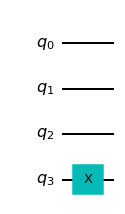

In [2]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw('mpl')

### 4.2 Сбалансированный оракул <a id='balanced_oracle'></a>

In [3]:
balanced_oracle = QuantumCircuit(n+1)

Далее мы создаем сбалансированный оракул. Мы можем создать сбалансированный оракул, выполняя CNOT с каждым входным кубитом в качестве контроля и выходным битом в качестве цели. Мы можем варьировать входные состояния, которые дают 0 или 1, обернув некоторые элементы управления в X-гейты. Давайте сначала выберем двоичную строку длины `n`, которая указывает, какие элементы управления следует обернуть:

In [4]:
b_str = "101"

Теперь у нас есть эта строка, мы можем использовать ее как ключ для размещения наших X-гейтов. Для каждого кубита в нашей схеме мы размещаем X-гейт, если соответствующая цифра в b_str равна 1, или ничего не делаем, если цифра 0.

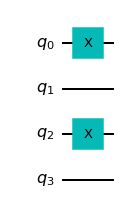

In [5]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

Затем мы применяем вентили «управляемое НЕ», используя каждый входной кубит в качестве элемента управления, а выходной кубит в качестве цели:

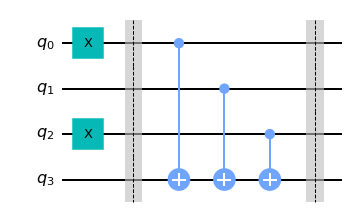

In [6]:
# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

balanced_oracle.draw('mpl')

Наконец, мы повторяем код с двух ячеек вверх, чтобы закончить оборачивать элементы управления в X-гейты:

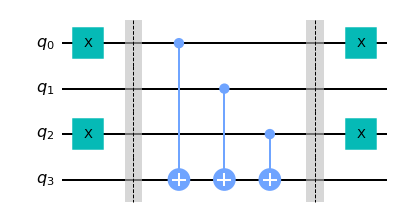

In [7]:
# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

balanced_oracle.draw('mpl')

Мы только что создали сбалансированный оракул! Все, что осталось сделать, это посмотреть, сможет ли алгоритм Дойча-Йожа решить эту проблему.

### 4.3 Полный алгоритм <a id='full_alg'></a>

Давайте теперь соберем все вместе. Этот первый шаг алгоритма заключается в инициализации входных кубитов в состоянии $|{+}\rangle$ и выходного кубита в состоянии $|{-}\rangle$:

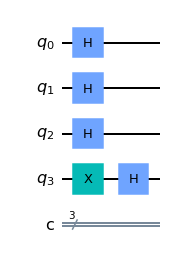

In [8]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.draw('mpl')

Далее применим оракул. Здесь мы применяем `balanced_oracle`, который мы создали выше:

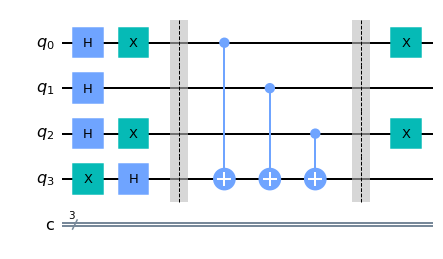

In [9]:
# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

dj_circuit.draw('mpl')

Наконец, мы выполняем H-гейты на $n$-входных кубитах и измеряем наш входной регистр:

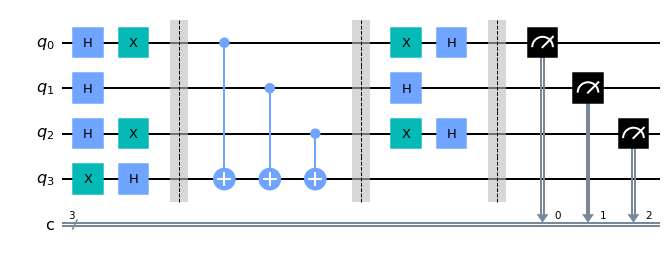

In [10]:
# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

Посмотрим на результат:

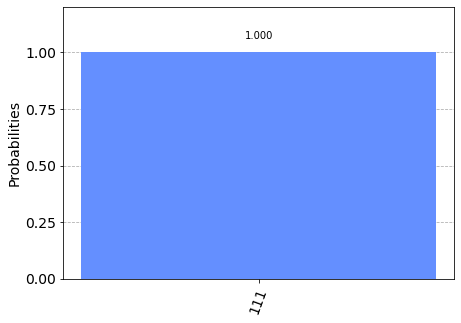

In [11]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)